BHARAT INTERN - BUSINESS ANALYTICS INTERN

In this intern, I was asked to perform any two task out of three

Task :

1. Forecasting the sales of a supermarket
2. Success of an upcoming movie
3. Employee and attrition and performance

Performed Task :

1. Success of an upcoming movie
2. Employee and attrition and performance

# **Task 1 - Predict Movie Sucess Rate**

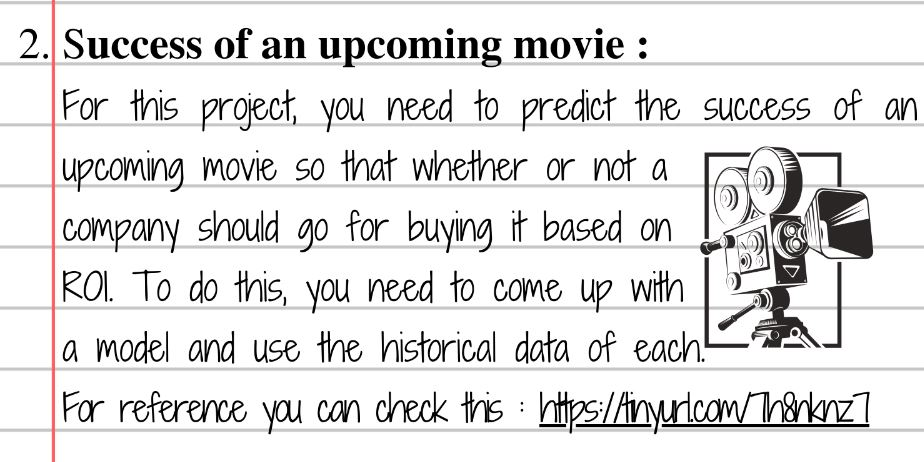

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read The Dataset

In [2]:
data = pd.read_csv("/content/movie_success_rate.csv")

## Explore The Dataset

### Display First 5 Data

In [3]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Column Names

In [4]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

### Rename The Columns

In [5]:
data.rename(columns={'Runtime (Minutes)':'Runtime_in_minutes' , 'Revenue (Millions)':'Revenue_in_million'} , inplace = True)

In [6]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_in_minutes', 'Rating', 'Votes', 'Revenue_in_million',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

### Checking Null Values

In [7]:
data.isnull().sum()

Rank                  1
Title                 1
Genre                 1
Description           1
Director              1
Actors                1
Year                  1
Runtime_in_minutes    1
Rating                0
Votes                 0
Revenue_in_million    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Musical               1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime_in_minutes    0
Rating                0
Votes                 0
Revenue_in_million    0
Metascore             0
Action                0
Adventure             0
Aniimation            0
Biography             0
Comedy                0
Crime                 0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
Western               0
Success               0
dtype: int64

### Column's Datatype

In [10]:
data.dtypes

Rank                  float64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                  float64
Runtime_in_minutes    float64
Rating                float64
Votes                 float64
Revenue_in_million    float64
Metascore             float64
Action                float64
Adventure             float64
Aniimation            float64
Biography             float64
Comedy                float64
Crime                 float64
Drama                 float64
Family                float64
Fantasy               float64
History               float64
Horror                float64
Music                 float64
Musical               float64
Mystery               float64
Romance               float64
Sci-Fi                float64
Sport                 float64
Thriller              float64
War                   float64
Western               float64
Success               float64
dtype: obj

### Rows & Columns

In [11]:
data.shape

(838, 33)

## OUTLIERS REMOVAL

We will be removing the outliers which are the abnormal value present in the dataset

and these outliers will affect our insights process

so we will be removing these outliers

we will be removing these outliers using box plot and z-score ( z>2 )

In [12]:
int_col = data.select_dtypes(include=['number']).columns
int_col

Index(['Rank', 'Year', 'Runtime_in_minutes', 'Rating', 'Votes',
       'Revenue_in_million', 'Metascore', 'Action', 'Adventure', 'Aniimation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Success'],
      dtype='object')

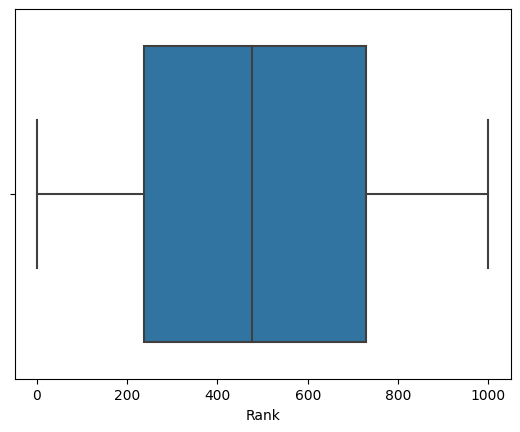

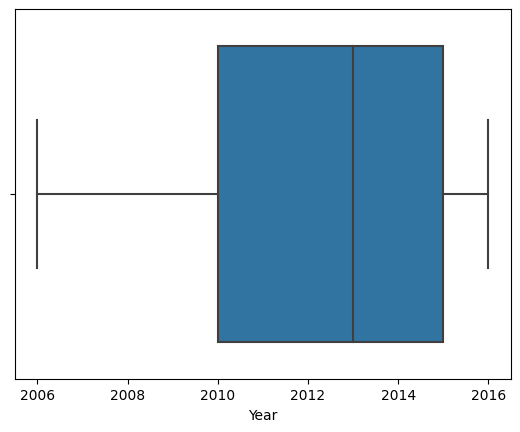

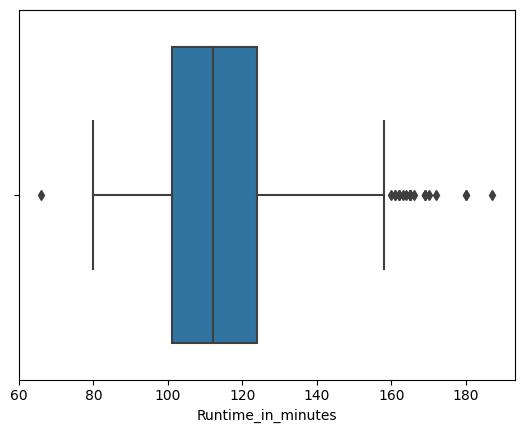

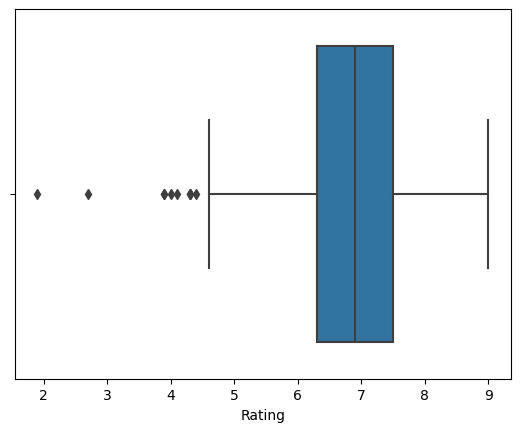

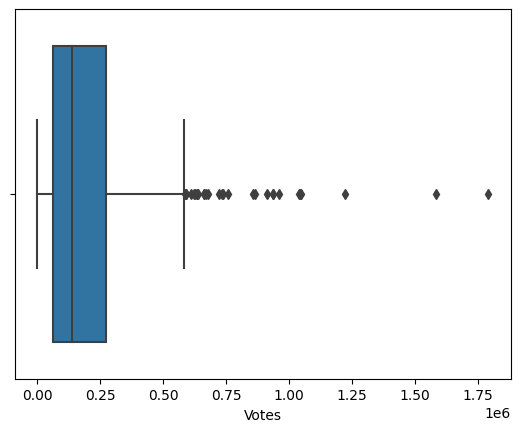

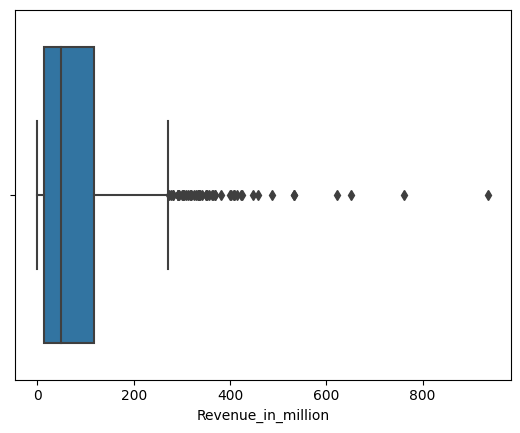

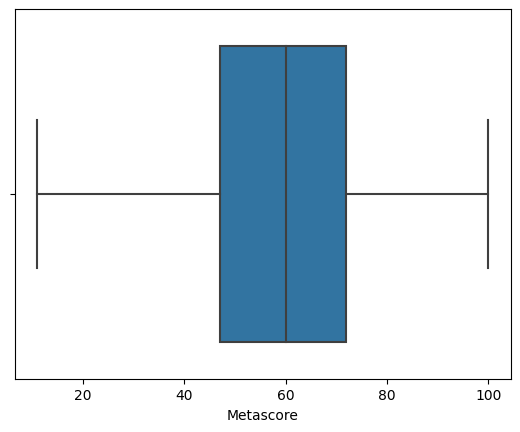

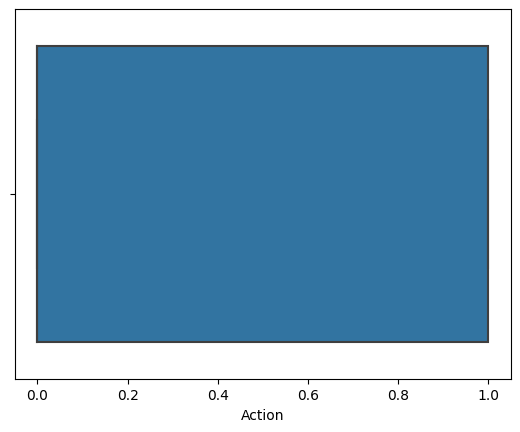

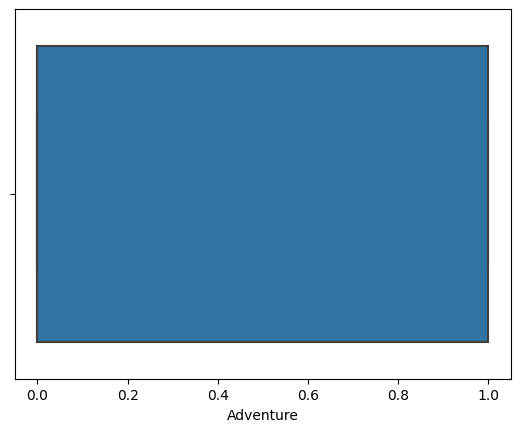

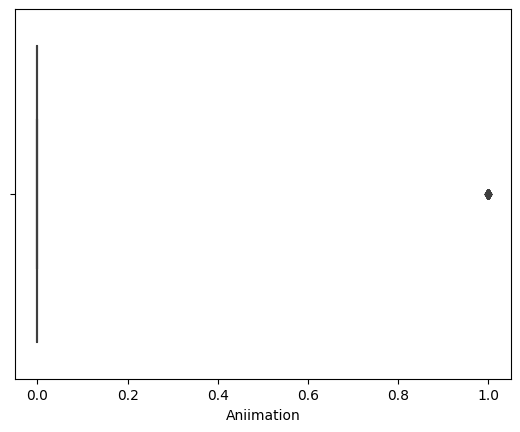

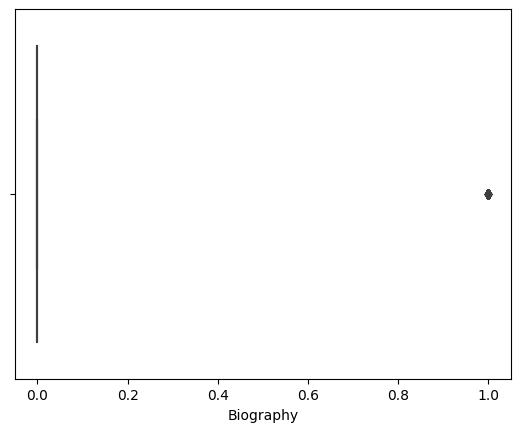

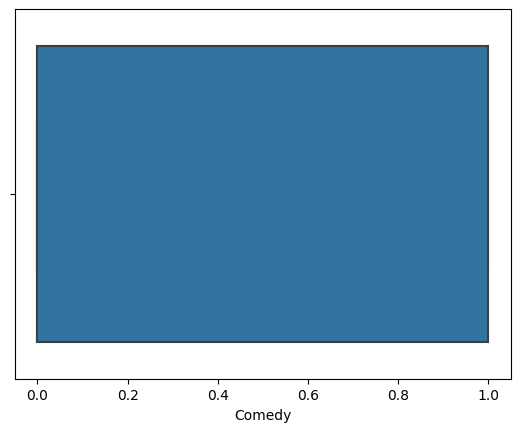

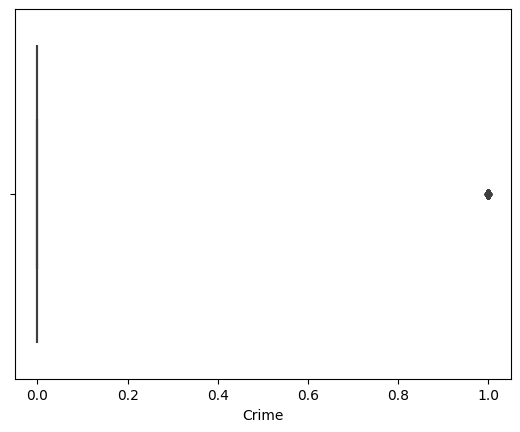

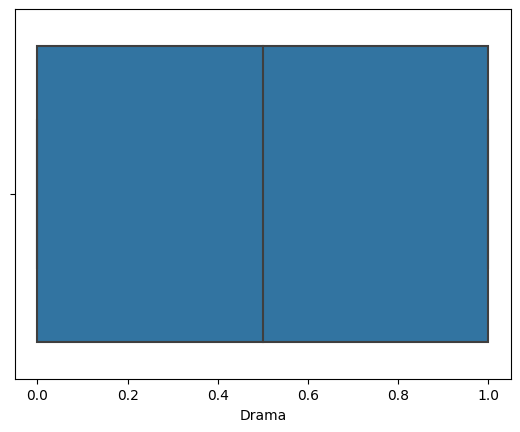

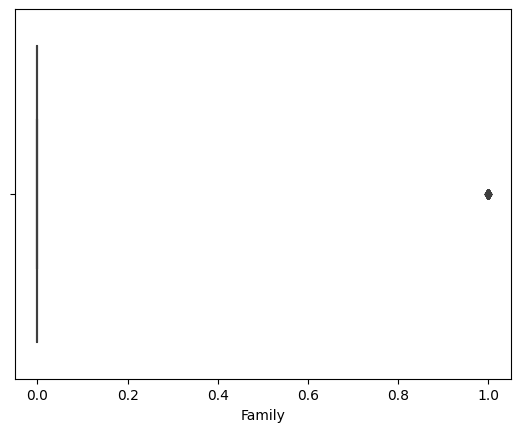

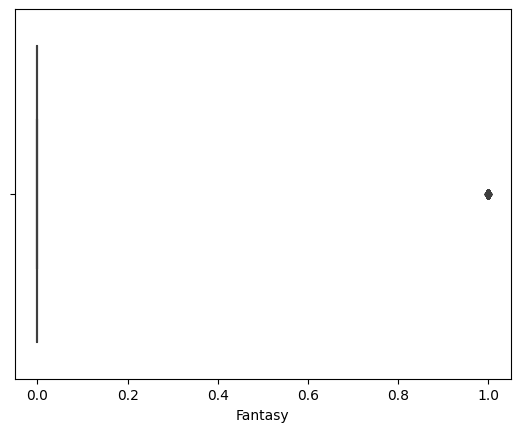

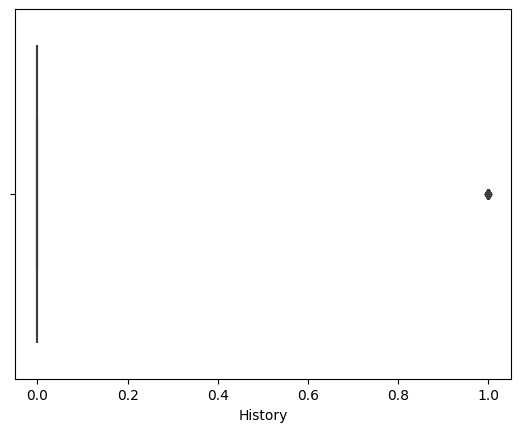

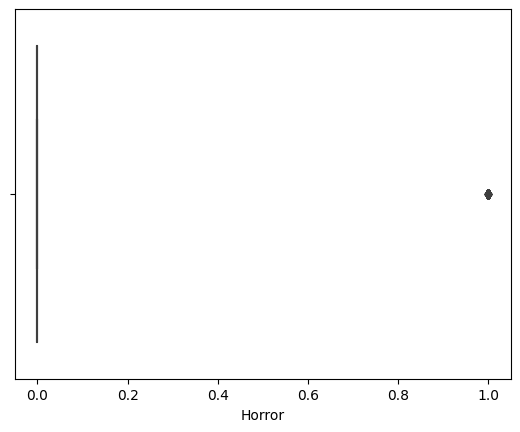

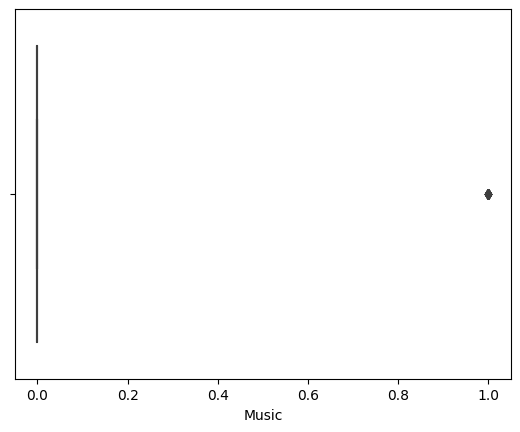

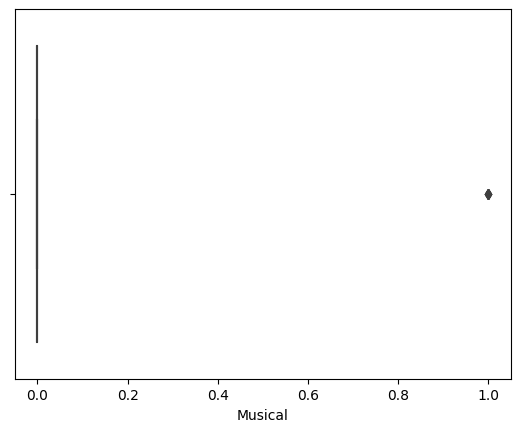

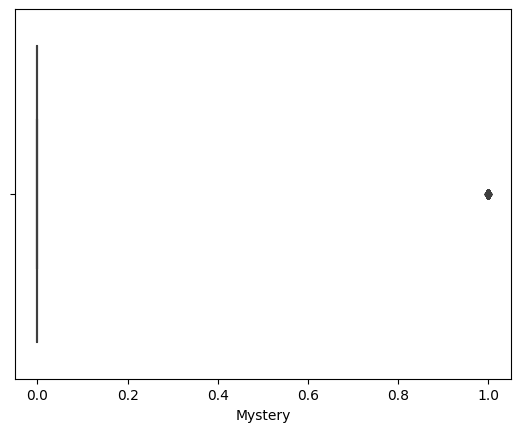

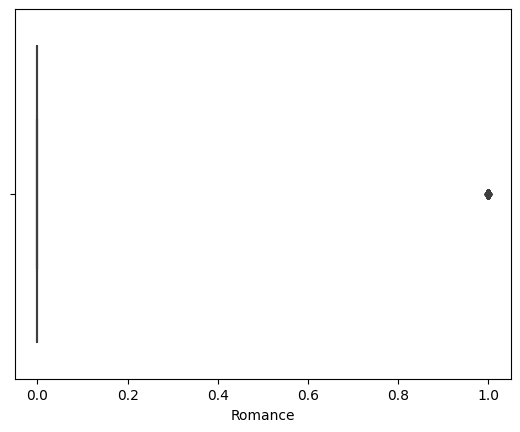

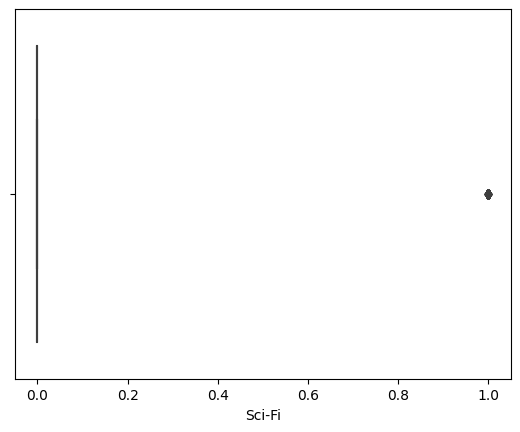

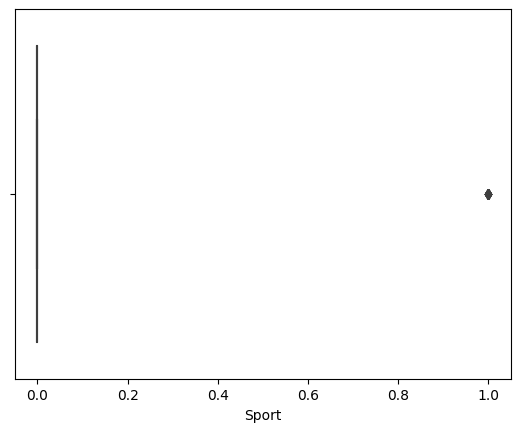

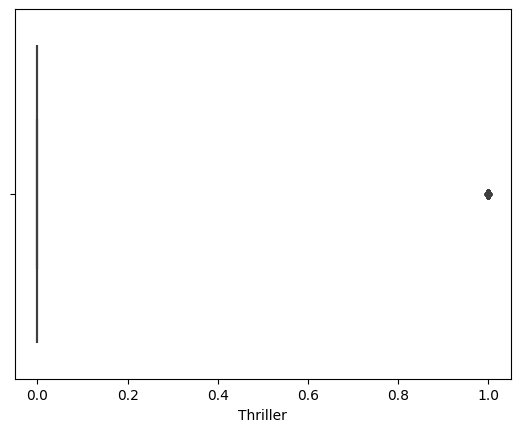

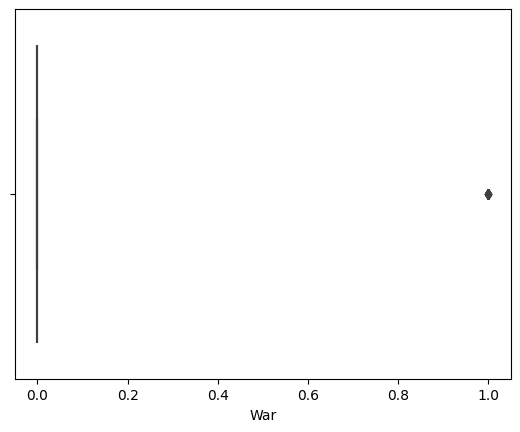

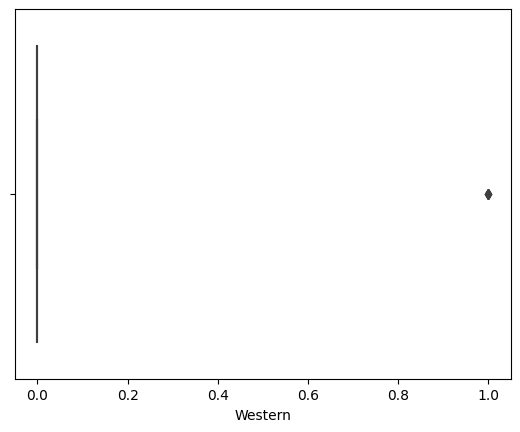

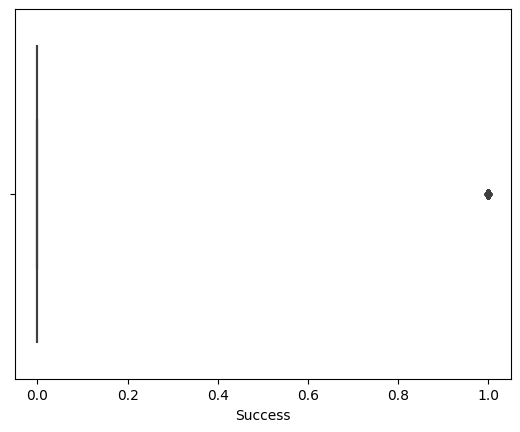

In [13]:
for i in int_col:
  sns.boxplot(data = data , x = i)
  plt.show()

Columns which have outliers are runtime_in_minutes , rating , votes , revenue_in million

In [14]:
def outli(data , mean, std , thres):

  out = []

  for j in data:
    z = (j - mean) / std

    if z > thres:
      out.append(j)

  return out

In [15]:
data1 = data['Revenue_in_million']
mean1 = np.mean(data1)
std1 = np.std(data1)

outliera = outli(data1 , mean1 , std1 , 2)

In [16]:
for x in outliera:
    data.drop(data[data['Revenue_in_million'] == x].index, inplace = True)

In [17]:
data2 = data['Rating']
mean2 = np.mean(data2)
std2 = np.std(data2)

outlierb = outli(data2 , mean2 , std2 , 2)

In [18]:
for y in outlierb:
    data.drop(data[data['Rating'] == y].index, inplace = True)

In [19]:
data3 = data['Votes']
mean3 = np.mean(data3)
std3 = np.std(data3)

outlierc = outli(data3 , mean3 , std3 , 2)

In [20]:
for z in outlierc:
    data.drop(data[data['Votes'] == z].index, inplace = True)

In [21]:
data4 = data['Revenue_in_million']
mean4 = np.mean(data4)
std4 = np.std(data4)

outlierd = outli(data4 , mean4 , std4 , 2)

In [22]:
for w in outlierd:
    data.drop(data[data['Revenue_in_million'] == w].index, inplace = True)

## Correlation

In [23]:
data.corr()

<ipython-input-23-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rank,Year,Runtime_in_minutes,Rating,Votes,Revenue_in_million,Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
Rank,1.000000,-0.367842,-0.181336,-0.139335,-0.146002,-0.126212,-0.145361,-0.103651,-0.074715,0.031746,...,0.042607,0.023124,0.014401,0.061518,-0.057265,0.045368,0.034724,0.016264,-0.002192,-0.096404
Year,-0.367842,1.000000,-0.073264,-0.132624,-0.454631,-0.184133,-0.033352,0.007397,0.003237,0.027822,...,-0.061674,-0.093548,-0.071777,-0.020597,-0.050482,-0.031043,-0.015951,-0.008217,0.013411,-0.149410
Runtime_in_minutes,-0.181336,-0.073264,1.000000,0.376120,0.283881,0.139257,0.232525,0.010115,0.009749,-0.189182,...,0.033183,0.073987,0.041214,0.009375,-0.053199,0.057478,-0.032378,-0.007458,0.025763,0.224879
Rating,-0.139335,-0.132624,0.376120,1.000000,0.440923,0.010880,0.648794,-0.208440,-0.128117,0.064784,...,0.082956,0.024053,0.083794,0.002698,-0.088791,0.057810,-0.034538,0.082933,0.012940,0.242057
Votes,-0.146002,-0.454631,0.283881,0.440923,1.000000,0.509101,0.275385,0.156560,0.093640,-0.066424,...,-0.005635,0.025769,0.106965,-0.040407,0.195920,-0.016508,0.003594,-0.017890,0.020396,0.482247
Revenue_in_million,-0.126212,-0.184133,0.139257,0.010880,0.509101,1.000000,-0.039423,0.238434,0.237890,0.157544,...,0.021068,0.056930,-0.056730,-0.085383,0.086304,0.011123,-0.028364,-0.055786,0.072757,0.448402
Metascore,-0.145361,-0.033352,0.232525,0.648794,0.275385,-0.039423,1.000000,-0.285563,-0.164299,0.080445,...,0.026124,0.010184,0.060025,-0.071478,-0.067042,0.033912,-0.009830,0.032280,0.005312,0.184496
Action,-0.103651,0.007397,0.010115,-0.208440,0.156560,0.238434,-0.285563,1.000000,0.358884,-0.034976,...,-0.110169,-0.054489,-0.090537,-0.230611,0.200892,-0.002291,-0.007511,-0.001612,0.005797,0.068811
Adventure,-0.074715,0.003237,0.009749,-0.128117,0.093640,0.237890,-0.164299,0.358884,1.000000,0.203259,...,-0.089123,-0.044080,-0.097363,-0.178167,0.164172,-0.074240,-0.152851,-0.052231,0.072434,0.025269
Aniimation,0.031746,0.027822,-0.189182,0.064784,-0.066424,0.157544,0.080445,-0.034976,0.203259,1.000000,...,-0.029283,-0.014483,-0.060887,-0.076854,-0.058250,-0.024393,-0.079965,-0.017161,-0.011203,-0.015672


<ipython-input-25-bc7ffcc47084>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() , annot = True , linewidths = 0.1)


<Axes: >

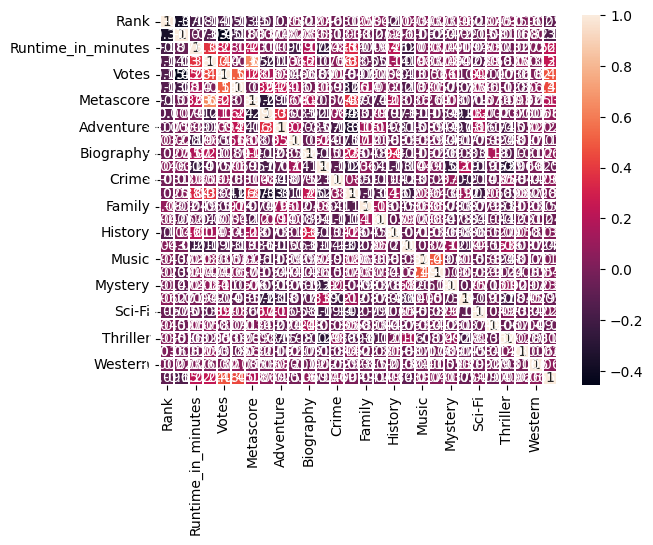

In [25]:
sns.heatmap(data.corr() , annot = True , linewidths = 0.1)

# MOVIE WITH HIGHEST RATING

In [26]:
high_rat = np.max(data['Rating'])

data[data['Rating']==high_rat]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
117,134.0,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014.0,107.0,8.5,477276.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,477.0,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006.0,137.0,8.5,278103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
832,992.0,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007.0,165.0,8.5,102697.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MOVIE WITH LOWEST RATING

In [27]:
low_rat = np.min(data['Rating'])

data[data['Rating']==low_rat]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
703,830.0,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008.0,87.0,1.9,77207.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MOVIE WITH HIGHEST VOTES

In [28]:
high_vot = np.max(data['Votes'])

data[data['Votes']==high_vot]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
98,112.0,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013.0,134.0,8.1,486338.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MOVIE WITH LOWEST VOTES

In [29]:
low_vot = np.min(data['Votes'])

data[data['Votes']==low_vot]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
222,251.0,Bonjour Anne,"Comedy,Drama,Romance",Anne is at a crossroads in her life. Long marr...,Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016.0,92.0,4.9,178.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# MOVIE WITH HIGHEST REVENUE

In [30]:
high_rev = np.max(data['Revenue_in_million'])

data[data['Revenue_in_million']==high_rev]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
366,412.0,Pitch Perfect 2,"Comedy,Music",After a humiliating command performance at The...,Elizabeth Banks,"Anna Kendrick, Rebel Wilson, Hailee Steinfeld,...",2015.0,115.0,6.5,108306.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MOVIE WITH LOWEST REVENUE

In [31]:
low_rev = np.min(data['Revenue_in_million'])

data[data['Revenue_in_million']==low_rev]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
203,232.0,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016.0,95.0,5.2,3305.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# MOVIE WITH HIGHEST META SCORE

In [32]:
high_met = np.max(data['Metascore'])

data[data['Metascore']==high_met]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
564,657.0,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014.0,165.0,7.9,286722.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MOVIE WITH LOWEST META SCORE

In [33]:
low_met = np.min(data['Metascore'])

data[data['Metascore']==low_met]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.3,12435.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LIST OF SUCESSFULL MOVIES

In [34]:
sucess = 1

data[data['Success']==sucess]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,7.0,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016.0,128.0,8.3,258682.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,20.0,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016.0,116.0,8.0,340798.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
27,33.0,X-Men: Apocalypse,"Action,Adventure,Sci-Fi",After the re-emergence of the world's first mu...,Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",2016.0,144.0,7.1,275510.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
55,66.0,Kingsman: The Secret Service,"Action,Adventure,Comedy","A spy organization recruits an unrefined, but ...",Matthew Vaughn,"Colin Firth, Taron Egerton, Samuel L. Jackson,...",2014.0,129.0,7.7,440209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,93.0,The Help,Drama,An aspiring author during the civil rights mov...,Tate Taylor,"Emma Stone, Viola Davis, Octavia Spencer, Bryc...",2011.0,146.0,8.1,342429.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121,138.0,The Great Gatsby,"Drama,Romance","A writer and wall street trader, Nick, finds h...",Baz Luhrmann,"Leonardo DiCaprio, Carey Mulligan, Joel Edgert...",2013.0,143.0,7.3,386102.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
130,148.0,Watchmen,"Action,Drama,Mystery","In 1985 where former superheroes exist, the mu...",Zack Snyder,"Jackie Earle Haley, Patrick Wilson, Carla Gugi...",2009.0,162.0,7.6,410249.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131,149.0,Superbad,Comedy,Two co-dependent high school seniors are force...,Greg Mottola,"Michael Cera, Jonah Hill, Christopher Mintz-Pl...",2007.0,113.0,7.6,442082.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
138,157.0,Pacific Rim,"Action,Adventure,Sci-Fi",As a war between humankind and monstrous sea c...,Guillermo del Toro,"Idris Elba, Charlie Hunnam, Rinko Kikuchi,Char...",2013.0,131.0,7.0,400519.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# LIST OF NON SUCESSFULL MOVIES

In [35]:
non_sucess = 0

data[data['Success']==non_sucess]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,6.0,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016.0,103.0,6.1,56036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9.0,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016.0,141.0,7.1,7188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.0,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016.0,116.0,7.0,192177.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016.0,127.0,7.8,93103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,994.0,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010.0,97.0,5.9,140900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.7,164088.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.5,73152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.2,70699.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# LIST OF ROMANCE MOVIES

In [36]:
data[data['Romance']==1]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
8,10.0,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016.0,116.0,7.0,192177.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
48,58.0,Me Before You,"Drama,Romance",A girl in a small town forms an unlikely bond ...,Thea Sharrock,"Emilia Clarke, Sam Claflin, Janet McTeer, Char...",2016.0,106.0,7.4,113322.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
49,59.0,Their Finest,"Comedy,Drama,Romance","A former secretary, newly appointed as a scrip...",Lone Scherfig,"Gemma Arterton, Sam Claflin, Bill Nighy, Jack ...",2016.0,117.0,7.0,3739.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53,64.0,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015.0,125.0,4.1,244474.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
60,72.0,Allied,"Action,Drama,Romance","In 1942, a Canadian intelligence officer in No...",Robert Zemeckis,"Brad Pitt, Marion Cotillard, Jared Harris, Vin...",2016.0,124.0,7.1,78079.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,953.0,Sex and the City 2,"Comedy,Drama,Romance","While wrestling with the pressures of life, lo...",Michael Patrick King,"Sarah Jessica Parker, Kim Cattrall, Kristin Da...",2010.0,146.0,4.3,62403.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
808,956.0,That Awkward Moment,"Comedy,Romance",Three best friends find themselves where we've...,Tom Gormican,"Zac Efron, Michael B. Jordan, Miles Teller, Im...",2014.0,94.0,6.2,81823.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
821,976.0,My Big Fat Greek Wedding 2,"Comedy,Family,Romance",A Portokalos family secret brings the beloved ...,Kirk Jones,"Nia Vardalos, John Corbett, Michael Constantin...",2016.0,94.0,6.0,20966.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
830,988.0,Endless Love,"Drama,Romance",The story of a privileged girl and a charismat...,Shana Feste,"Gabriella Wilde, Alex Pettyfer, Bruce Greenwoo...",2014.0,104.0,6.3,33688.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# LIST OF MYSTERY MOVIES

In [37]:
data[data['Mystery']==1]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
18,20.0,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016.0,116.0,8.0,340798.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
52,63.0,The Girl on the Train,"Crime,Drama,Mystery",A divorcee becomes entangled in a missing pers...,Tate Taylor,"Emily Blunt, Haley Bennett, Rebecca Ferguson, ...",2016.0,112.0,6.5,102177.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,89.0,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015.0,187.0,7.8,341170.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,91.0,Prisoners,"Crime,Drama,Mystery",When Keller Dover's daughter and her friend go...,Denis Villeneuve,"Hugh Jackman, Jake Gyllenhaal, Viola Davis,Mel...",2013.0,153.0,8.1,431185.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,914.0,Coherence,"Mystery,Sci-Fi,Thriller",Strange things begin to happen when a group of...,James Ward Byrkit,"Emily Baldoni, Maury Sterling, Nicholas Brendo...",2013.0,89.0,7.2,66265.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
796,941.0,The Midnight Meat Train,"Horror,Mystery",A photographer's obsessive pursuit of dark sub...,Ryûhei Kitamura,"Vinnie Jones, Bradley Cooper, Leslie Bibb, Bro...",2008.0,98.0,6.1,50255.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
812,960.0,Lucky Number Slevin,"Crime,Drama,Mystery",A case of mistaken identity lands Slevin into ...,Paul McGuigan,"Josh Hartnett, Ben Kingsley, Morgan Freeman, L...",2006.0,110.0,7.8,271940.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813,961.0,Trance,"Crime,Drama,Mystery",An art auctioneer who has become mixed up with...,Danny Boyle,"James McAvoy, Rosario Dawson, Vincent Cassel,D...",2013.0,101.0,7.0,97141.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LIST OF THRILLER MOVIES

In [38]:
data[data['Thriller']==1]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16,18.0,Jason Bourne,"Action,Thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016.0,123.0,6.7,150823.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,21.0,Gold,"Adventure,Drama,Thriller","Kenny Wells, a prospector desperate for a luck...",Stephen Gaghan,"Matthew McConaughey, Edgar Ramírez, Bryce Dall...",2016.0,120.0,6.7,19053.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26,32.0,Nocturnal Animals,"Drama,Thriller",A wealthy art gallery owner is haunted by her ...,Tom Ford,"Amy Adams, Jake Gyllenhaal, Michael Shannon, A...",2016.0,116.0,7.5,126030.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39,47.0,Miss Sloane,"Drama,Thriller",In the high-stakes world of political power-br...,John Madden,"Jessica Chastain, Mark Strong, Gugu Mbatha-Raw...",2016.0,132.0,7.3,17818.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,962.0,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015.0,101.0,5.9,10220.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
816,964.0,I Spit on Your Grave,"Crime,Horror,Thriller",A writer who is brutalized during her cabin re...,Steven R. Monroe,"Sarah Butler, Jeff Branson, Andrew Howard,Dani...",2010.0,108.0,6.3,60133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
817,971.0,Texas Chainsaw 3D,"Horror,Thriller",A young woman travels to Texas to collect an i...,John Luessenhop,"Alexandra Daddario, Tania Raymonde, Scott East...",2013.0,92.0,4.8,37060.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
822,980.0,The Skin I Live In,"Drama,Thriller","A brilliant plastic surgeon, haunted by past t...",Pedro Almodóvar,"Antonio Banderas, Elena Anaya, Jan Cornet,Mari...",2011.0,120.0,7.6,108772.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# LIST OF SPORTS MOVIES

In [39]:
data[data['Sport']==1]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_in_minutes,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
171,195.0,Warrior,"Action,Drama,Sport",The youngest son of an alcoholic former boxer ...,Gavin O'Connor,"Tom Hardy, Nick Nolte, Joel Edgerton, Jennifer...",2011.0,140.0,8.2,355722.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
337,378.0,Creed,"Drama,Sport",The former World Heavyweight Champion Rocky Ba...,Ryan Coogler,"Michael B. Jordan, Sylvester Stallone, Tessa T...",2015.0,133.0,7.6,175673.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
341,382.0,Southpaw,"Drama,Sport",Boxer Billy Hope turns to trainer Tick Wills t...,Antoine Fuqua,"Jake Gyllenhaal, Rachel McAdams, Oona Laurence...",2015.0,124.0,7.4,169083.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
432,494.0,Point Break,"Action,Crime,Sport",A young FBI agent infiltrates an extraordinary...,Ericson Core,"Edgar Ramírez, Luke Bracey, Ray Winstone, Tere...",2015.0,114.0,5.3,44553.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
475,549.0,Chuck,"Biography,Drama,Sport",A drama inspired by the life of heavyweight bo...,Philippe Falardeau,"Elisabeth Moss, Naomi Watts, Ron Perlman, Liev...",2016.0,98.0,6.8,391.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
498,575.0,Bleed for This,"Biography,Drama,Sport",The inspirational story of World Champion Boxe...,Ben Younger,"Miles Teller, Aaron Eckhart, Katey Sagal, Ciar...",2016.0,117.0,6.8,11900.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
507,585.0,Moneyball,"Biography,Drama,Sport",Oakland A's general manager Billy Beane's succ...,Bennett Miller,"Brad Pitt, Robin Wright, Jonah Hill, Philip Se...",2011.0,133.0,7.6,297395.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
509,587.0,Unbroken,"Biography,Drama,Sport","After a near-fatal plane crash in WWII, Olympi...",Angelina Jolie,"Jack O'Connell, Miyavi, Domhnall Gleeson, Garr...",2014.0,137.0,7.2,114006.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
516,594.0,She's the Man,"Comedy,Romance,Sport",When her brother decides to ditch for a couple...,Andy Fickman,"Amanda Bynes, Laura Ramsey, Channing Tatum,Vin...",2006.0,105.0,6.4,122864.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
519,597.0,Never Back Down,"Action,Drama,Sport",A frustrated and conflicted teenager arrives a...,Jeff Wadlow,"Sean Faris, Djimon Hounsou, Amber Heard, Cam G...",2008.0,110.0,6.6,84083.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# IN WHICH YEAR MOST MOVIES HAS BEEN RELEASED

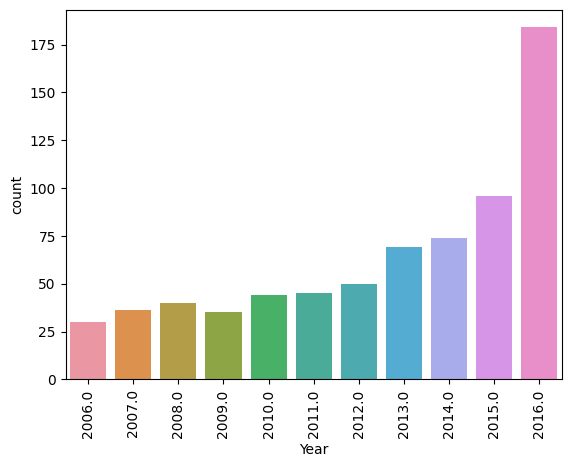

In [40]:
sns.countplot(data = data , x = 'Year')
plt.xticks(rotation = 90);

# MODEL BUILDING

For our model we need to come up with a model which can help to find

whether the movie will be sucess / not sucess

I have used hyperparameter tuning which is gridserach cv to find best

parameter in each model

In [41]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [42]:
data.drop(columns=['Rank','Title'] , axis = 1 , inplace = True)

In [43]:
data.columns

Index(['Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_in_minutes', 'Rating', 'Votes', 'Revenue_in_million',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [44]:
gen = LabelEncoder()
des = LabelEncoder()
dir = LabelEncoder()
act = LabelEncoder()

In [45]:
data['Genre'] = gen.fit_transform(data['Genre'])
data['Description'] = des.fit_transform(data['Description'])
data['Director'] = dir.fit_transform(data['Director'])
data['Actors'] = act.fit_transform(data['Actors'])

In [46]:
x = data[['Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_in_minutes', 'Rating', 'Votes', 'Revenue_in_million',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]
y = data['Success']

In [47]:
x_train , x_test , y_train , y_test  = train_test_split(x , y ,test_size = 0.2)

**LOGISTIC REGRESSION**

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lrc = GridSearchCV(LogisticRegression() , {
    'penalty':['l1','l2','elasticnet','None']
} , cv = 5)

In [50]:
lrc.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'None']})

In [51]:
lrc.best_params_

{'penalty': 'l2'}

In [52]:
lr = LogisticRegression(penalty = 'l2')

In [53]:
lr.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
lr.score(x_test , y_test)

0.9574468085106383

Score is 95%

In [57]:
y_test[0:10]

1      1.0
716    0.0
430    1.0
429    0.0
178    0.0
562    0.0
185    0.0
527    1.0
735    0.0
776    0.0
Name: Success, dtype: float64

In [58]:
lr.predict(x_test[0:10])

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

**DECISION TREE CLASSIFIER**

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtc = GridSearchCV(DecisionTreeClassifier() , {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random']
} , cv = 5)

In [61]:
dtc.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [62]:
dtc.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [63]:
dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')

In [64]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
dt.score(x_test , y_test)

1.0

Score is 100%

In [66]:
y_test[0:10]

1      1.0
716    0.0
430    1.0
429    0.0
178    0.0
562    0.0
185    0.0
527    1.0
735    0.0
776    0.0
Name: Success, dtype: float64

In [67]:
dt.predict(x_test[0:10])

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

**RANDOM FOREST CLASSIFIER**

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = GridSearchCV( RandomForestClassifier() , {
    'criterion' : ['entropy' , 'log_loss' , 'gini']
},cv = 5)

In [70]:
rf.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'log_loss', 'gini']})

In [71]:
rf.best_params_

{'criterion': 'log_loss'}

In [72]:
rfc = RandomForestClassifier(criterion = 'log_loss')

In [73]:
rfc.fit(x_train , y_train)

RandomForestClassifier(criterion='log_loss')

In [74]:
rfc.score(x_test , y_test)

0.9929078014184397

Score is 99%

In [75]:
y_test[0:10]

1      1.0
716    0.0
430    1.0
429    0.0
178    0.0
562    0.0
185    0.0
527    1.0
735    0.0
776    0.0
Name: Success, dtype: float64

In [76]:
rfc.predict(x_test[0:10])

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

The best model we can use for this dataset is Decision Tree Classifier

# Task 2 - EMPLOYEE ATTRITION

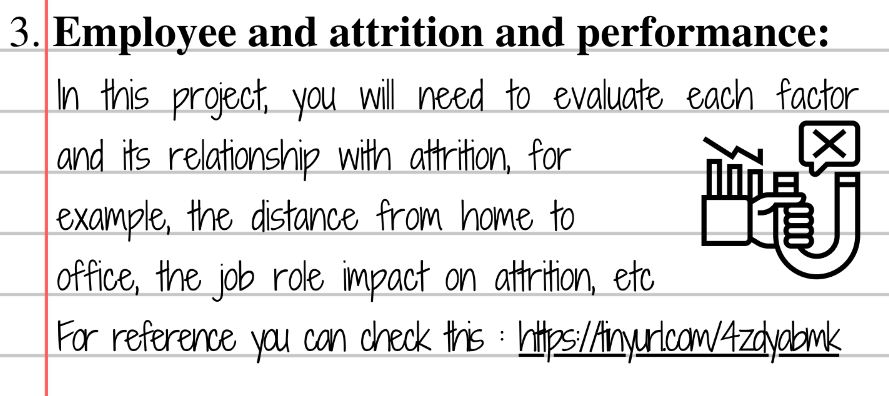

# **IMPORT LIBRARIES**

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **READ THE DATA**

In [78]:
data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# **FIRST DATA**

In [79]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **COLUMN NAMES**

In [80]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **CHECKING NULL VALUES**

In [81]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# **NO OF ROWS & COLUMNS**

In [82]:
data.shape

(1470, 35)

# **DATA TYPE**

In [83]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# **STATISTICAL MEASURES**

In [84]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **MODEL BUILDING**

In [85]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [86]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [87]:
attri = LabelEncoder()
bt = LabelEncoder()
dep = LabelEncoder()
ef = LabelEncoder()
gen = LabelEncoder()
jr = LabelEncoder()
mar = LabelEncoder()
ovr18 = LabelEncoder()
ovrtme = LabelEncoder()

In [88]:
data['Attrition'] = attri.fit_transform(data['Attrition'])
data['BusinessTravel'] = bt.fit_transform(data['BusinessTravel'])
data['Department'] = dep.fit_transform(data['Department'])
data['EducationField'] = ef.fit_transform(data['EducationField'])
data['Gender'] = gen.fit_transform(data['Gender'])
data['JobRole'] = jr.fit_transform(data['JobRole'])
data['MaritalStatus'] = mar.fit_transform(data['MaritalStatus'])
data['Over18'] = ovr18.fit_transform(data['Over18'])
data['OverTime'] = ovrtme.fit_transform(data['OverTime'])

In [89]:
x = data.drop(columns=['Attrition'] , axis = 1)
y = data['Attrition']

In [90]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

**LOGISTIC REGRESSION**

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
lr.score(x_test , y_test)

0.8741496598639455

Score is 87%

In [95]:
y_test[0:10]

239     1
1051    0
284     0
1221    0
246     0
436     1
1283    0
1144    0
157     0
326     0
Name: Attrition, dtype: int64

In [96]:
lr.predict(x_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**DECISION TREE CLASSIFIER**

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dtc = DecisionTreeClassifier()

In [99]:
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [100]:
dtc.score(x_test , y_test)

0.8095238095238095

Score is 80%

In [101]:
y_test[0:10]

239     1
1051    0
284     0
1221    0
246     0
436     1
1283    0
1144    0
157     0
326     0
Name: Attrition, dtype: int64

In [102]:
dtc.predict(x_test[0:10])

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

**SUPPORT VECTOR CLASSIFIER**

In [103]:
from sklearn.svm import SVC

In [104]:
svc = SVC()

In [105]:
svc.fit(x_train , y_train)

SVC()

In [106]:
svc.score(x_test , y_test)

0.8707482993197279

Score is 87%

In [107]:
y_test[0:10]

239     1
1051    0
284     0
1221    0
246     0
436     1
1283    0
1144    0
157     0
326     0
Name: Attrition, dtype: int64

In [108]:
svc.predict(x_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])